The Business Problem,
You recently started working for a company that manufactures and sells high-end home goods. Last year the company sent out its first print catalog, and is preparing to send out this year's catalog in the coming months. The company has 250 new customers from their mailing list that they want to send the catalog to.

Your manager has been asked to determine how much profit the company can expect from sending a catalog to these customers. You, the business analyst, are assigned to help your manager run the numbers. While fairly knowledgeable about data analysis, your manager is not very familiar with predictive models.

You’ve been asked to predict the expected profit from these 250 new customers. Management does not want to send the catalog out to these new customers unless the expected profit contribution exceeds $10,000.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

Read an Excel table into a pandas DataFrame and view the last five rows

In [57]:
df = pd.read_excel("p1-customers.xlsx")
df.tail()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
2370,Joan Delisa,Credit Card Only,3287,1657 S King St,Denver,CO,80219,818.72,101,No,5,1
2371,Helen Cordiner,Credit Card Only,3299,2102 S Lansing Ct,Aurora,CO,80014,564.93,105,No,6,4
2372,Angela Finley,Credit Card Only,3303,1068 S Jasper St,Aurora,CO,80017,605.07,105,No,6,4
2373,Christine Sullivan,Credit Card Only,3304,7901 W 52nd Ave,Arvada,CO,80002,656.79,107,No,7,7
2374,Elissa Engledow,Credit Card Only,3315,9360 E Center Ave,Denver,CO,80247,167.59,104,No,1,3


with info() we can see the number of calums and numerical values in the dataframe

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
Name                          2375 non-null object
Customer_Segment              2375 non-null object
Customer_ID                   2375 non-null int64
Address                       2375 non-null object
City                          2375 non-null object
State                         2375 non-null object
ZIP                           2375 non-null int64
Avg_Sale_Amount               2375 non-null float64
Store_Number                  2375 non-null int64
Responded_to_Last_Catalog     2375 non-null object
Avg_Num_Products_Purchased    2375 non-null int64
#_Years_as_Customer           2375 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 222.7+ KB


In [59]:
df.shape

(2375, 12)

pltoing data to see visual patterns 

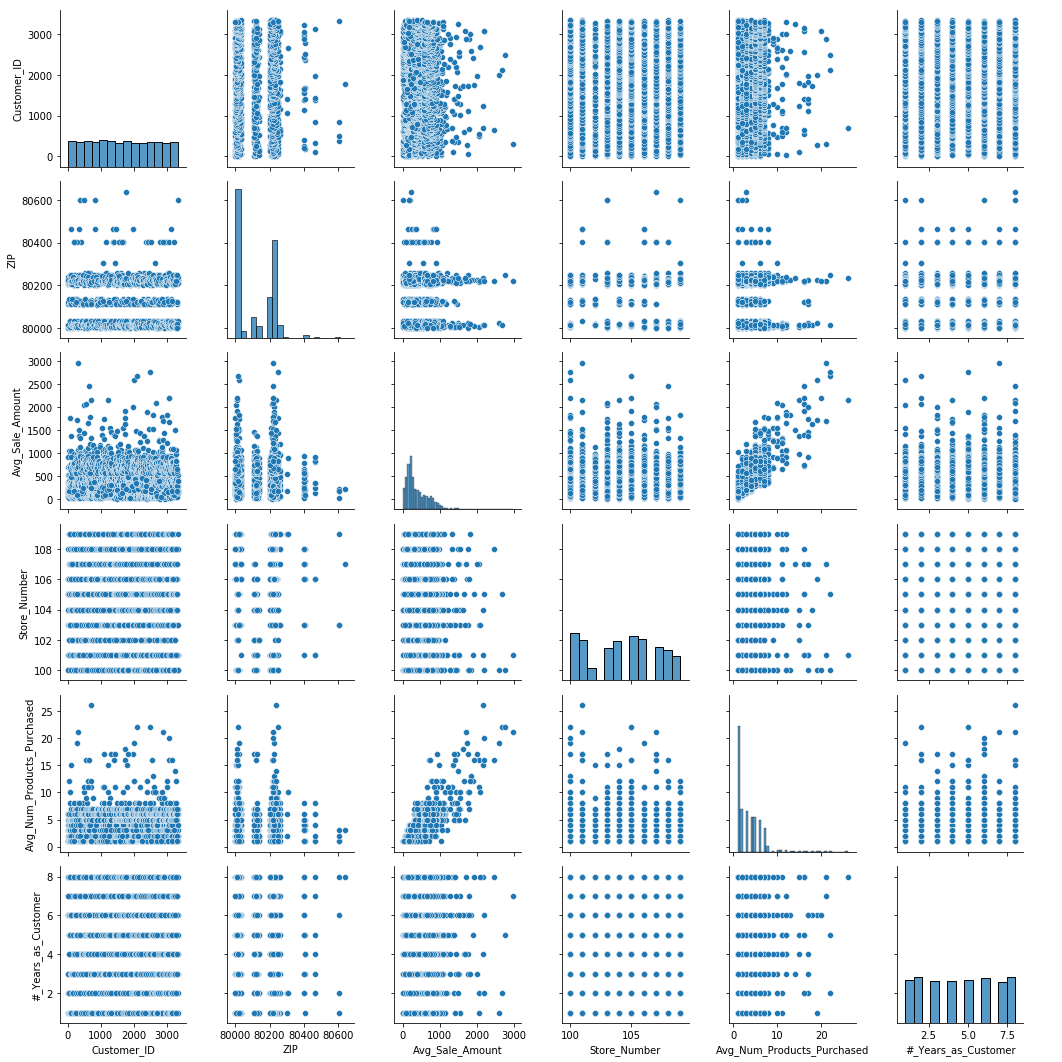

In [60]:
sns.pairplot(df)
plt.show()

scatterplots to see the linear relation  

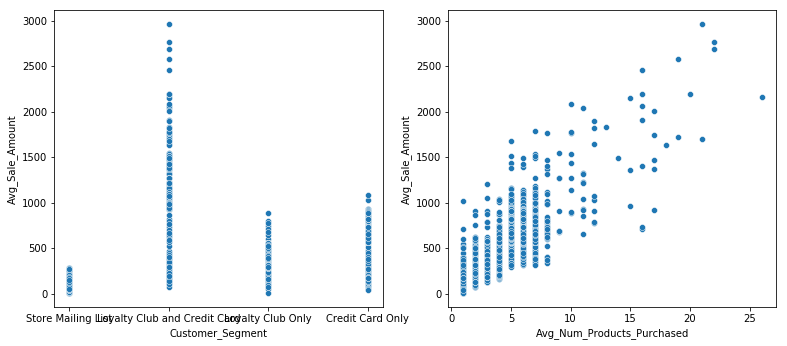

In [61]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.scatterplot(x="Customer_Segment", y='Avg_Sale_Amount',data=df)
plt.subplot(2,3,2)
sns.scatterplot(x="Avg_Num_Products_Purchased", y='Avg_Sale_Amount',data=df)
plt.show()

To count the unique values of Costomer segment 

In [62]:
df.Customer_Segment.value_counts()

Store Mailing List              1108
Loyalty Club Only                579
Credit Card Only                 494
Loyalty Club and Credit Card     194
Name: Customer_Segment, dtype: int64

Used pandas get_dummies to Convert categorical variable into dummy/indicator variables

In [63]:
status = pd.get_dummies(df['Customer_Segment'],drop_first=True)
status.head()

,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


Concating the dummies to the orignal dataframe

In [64]:
df = pd.concat([df,status], axis=1)
df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6,0,0,1
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6,0,0,1
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3,0,0,1
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6,0,0,1
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2,0,0,1


Droping veriables with low corealtion 

In [65]:
df = df.drop(['#_Years_as_Customer','Customer_Segment','Customer_ID','Responded_to_Last_Catalog','Address','City','ZIP','Name','State','Store_Number'],axis=1)
df.head()

,Avg_Sale_Amount,Avg_Num_Products_Purchased,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,227.90,1,0,0,1
1,55.00,1,0,0,1
2,212.57,1,0,0,1
3,195.31,1,0,0,1
4,110.55,1,0,0,1


Using sklearn's train test split to split the data into train and test sets

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test = train_test_split(df, test_size=0.33, random_state=42)

In [68]:
X_train.shape

(1591, 5)

In [69]:
X_test.shape

(784, 5)

Using Sklearn's minmaxscaler to scale the data for machine learning model 

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
var = ['Avg_Sale_Amount']
X_train[var] = scaler.fit_transform(X_train[var])
X_train.head()

,Avg_Sale_Amount,Avg_Num_Products_Purchased,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
1653,0.196684,5,1,0,0
261,0.086762,1,0,0,1
1303,0.130382,4,1,0,0
748,0.010871,1,0,0,1
2009,0.222817,6,0,0,0


ploting heatmap correlation to see the correlation of veriables 

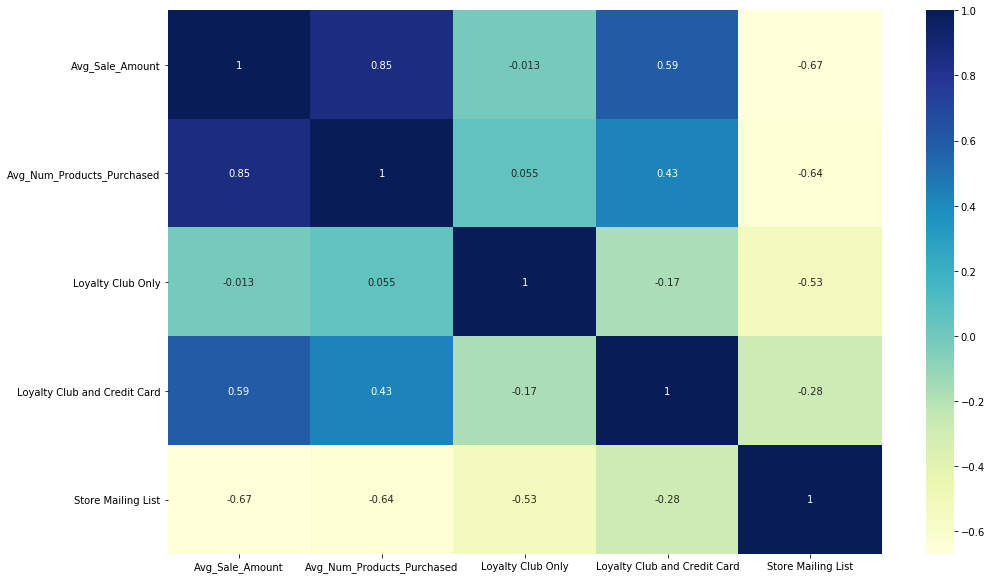

In [73]:
plt.figure(figsize=(16,10))
sns.heatmap(X_train.corr(), annot=True,cmap='YlGnBu')
plt.show()

poping target variable out of train data and storing it into y train

In [74]:
y_train = X_train.pop('Avg_Sale_Amount')

Using Statmodel for linear reggresion 

In [75]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_modle = lr.fit()
lr_modle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     2064.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:33:28   Log-Likelihood:                 2507.9
No. Observations:                1591   AIC:                            -5006.
Df Residuals:                    1586   BIC:                            -4979.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1088      0.005     22.951      0.000       0.099       0.118
Avg_Num_Products_Purchased       0.0245      0.001     35.997      0.000       0.023       0.026
Loyalty Club Only               -0.0566      0.004    -14.165      0.000      -0.064      -0.049
Loyalty Club and Credit Card     0.1013      0.005     19.487      0.000       0.091       0.112
Store Mailing List              -0.0912      0.004    -20.922      0.000      -0.100      -0.083
==============================================================================
Omnibus:                      199.156   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2004.343
Skew:                           0.116   Prob(JB):                         0.00
Kurtosis:                       8.494   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predicting on the model 

In [76]:
y_train_pred = lr_modle.predict(X_train_sm)


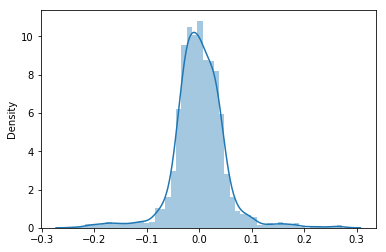

In [77]:
res = y_train - y_train_pred
sns.distplot(res)

Transforming the test data

In [78]:
var = ['Avg_Sale_Amount']
X_test[var] = scaler.transform(X_test[var])
X_test.tail()

,Avg_Sale_Amount,Avg_Num_Products_Purchased,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
352,0.074762,2,0,0,1
91,0.081640,1,0,0,1
1503,0.105262,3,1,0,0
2190,0.295957,5,0,0,0
2372,0.217093,6,0,0,0


In [79]:
y_test = X_test.pop('Avg_Sale_Amount')

In [80]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Avg_Num_Products_Purchased,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
2054,1.0,7,0,0,0
1812,1.0,5,1,0,0
100,1.0,1,0,0,1
2286,1.0,7,0,0,0
56,1.0,1,0,0,1


In [81]:
y_test_pred = lr_modle.predict(X_test_sm)

In [82]:
from sklearn.metrics import r2_score

R^2 (coefficient of determination) regression score function.

In [83]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.831976939814702

importing the mailing list data of 250 coustomers

In [84]:
final_df = pd.read_excel('p1-mailinglist.xlsx')

In [85]:
final_df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


In [86]:
final_df.shape

(250, 12)

In [87]:
Yno = final_df[["Score_No","Score_Yes"]]
Yno.head()

,Score_No,Score_Yes
0,0.694964,0.305036
1,0.527275,0.472725
2,0.421118,0.578882
3,0.694862,0.305138
4,0.612294,0.387706


wrangling the data so we can use it to pridict 

In [88]:
status = pd.get_dummies(final_df['Customer_Segment'],drop_first=True)
status.head()

,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [89]:
final_df = final_df.drop(['#_Years_as_Customer','Customer_Segment','Customer_ID','Address','City','ZIP',
                          'Name','State','Store_Number',"Score_Yes","Score_No"],axis=1)
final_df = pd.concat([final_df,status], axis=1)
final_df.head()

,Avg_Num_Products_Purchased,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,3,1,0,0
1,6,0,1,0
2,7,1,0,0
3,2,1,0,0
4,4,1,0,0


In [90]:
true_test_pred = sm.add_constant(final_df)
true_test_pred.shape

(250, 5)

In [91]:
true_test = lr_modle.predict(true_test_pred)

In [92]:
true_test.size

250

In [93]:
Customers = pd.DataFrame(true_test,columns=['Avg_Sale_Amount'])

In [94]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 1 columns):
Avg_Sale_Amount    250 non-null float64
dtypes: float64(1)
memory usage: 2.0 KB


In [95]:
Customers = pd.concat([Customers,Yno], axis=1)

In [96]:
Customers.head()

,Avg_Sale_Amount,Score_No,Score_Yes
0,0.125694,0.694964,0.305036
1,0.357110,0.527275,0.472725
2,0.223674,0.421118,0.578882
3,0.101199,0.694862,0.305138
4,0.150189,0.612294,0.387706


In [97]:
var = ['Avg_Sale_Amount']
Customers[var] = scaler.inverse_transform(Customers[var])
Customers.head()

,Avg_Sale_Amount,Score_No,Score_Yes
0,353.252944,0.694964,0.305036
1,990.833885,0.527275,0.472725
2,623.200314,0.421118,0.578882
3,285.766101,0.694862,0.305138
4,420.739786,0.612294,0.387706


In [98]:
Customers["Expected_Revenue"] = Customers['Avg_Sale_Amount'] * Customers['Score_Yes']

In [99]:
Total_profit= Customers['Expected_Revenue'].sum()

In [100]:
Total_profit*0.5-6.5*250

22059.55682132773